In [44]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"

In [23]:
# library(reshape)
library(ggthemes)
library(ggplot2)
library(dplyr)
library(tidyr)

In [24]:
mashr_dir = "/hps/nobackup/hipsci/scratch/GTEx/MASHR_OUT/Anna_Neuro/"

In [25]:
list.files(mashr_dir)

[1] "MASHR_local_false_sign_rate_NeuroSeq.txt"           
[2] "MASHR_pairwise_sharing_F0.05_same_sign_NeuroSeq.txt"
[3] "MASHR_pairwise_sharing_same_sign_NeuroSeq.txt"      
[4] "MASHR_posterior_mean_NeuroSeq.txt"                  
[5] "MASHR_posterior_standard_deviation_NeuroSeq.txt"    
[6] "MASHR_Results.OriginalCovariance.NeuroSeq.Rdata"    
[7] "MASHR_significant_effects_NeuroSeq.txt"

In [26]:
sign_res = paste0(mashr_dir,"MASHR_local_false_sign_rate_NeuroSeq.txt")
mean_beta = paste0(mashr_dir,"MASHR_posterior_mean_NeuroSeq.txt")
# std_beta = paste0(mashr_dir,"MASHR_posterior_standard_deviation_sc_brain.txt")

In [27]:
##Functions
reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd,method="complete")
  cormat <-cormat[hc$order, hc$order]
}

In [28]:
get_upper_tri <- function(cormat){
  cormat[upper.tri(cormat)]<- NA
  return(cormat)
}

In [29]:
# local false sign rate (lfsr)
lfsrMat = read.delim(sign_res,as.is=T, row.names=1)
posteriorMean = read.delim(mean_beta,as.is=T, row.names=1)

In [30]:
nrow(lfsrMat)
ncol(lfsrMat)

[1] 9641

[1] 14

In [31]:
colnames(lfsrMat)

[1] "Neuro.pool1_13_noddd_D11.FPP"   "Neuro.pool1_13_noddd_D11.P_FPP"
 [3] "Neuro.pool1_13_noddd_D30.Astro" "Neuro.pool1_13_noddd_D30.DA"   
 [5] "Neuro.pool1_13_noddd_D30.Epen1" "Neuro.pool1_13_noddd_D30.Sert" 
 [7] "Neuro.pool1_17_D52.ROT.Astro"   "Neuro.pool1_17_D52.ROT.DA"     
 [9] "Neuro.pool1_17_D52.ROT.Epen1"   "Neuro.pool1_17_D52.ROT.Sert"   
[11] "Neuro.pool1_17_D52.Astro"       "Neuro.pool1_17_D52.DA"         
[13] "Neuro.pool1_17_D52.Epen1"       "Neuro.pool1_17_D52.Sert"

In [32]:
head(lfsrMat,2)

,Neuro.pool1_13_noddd_D11.FPP,Neuro.pool1_13_noddd_D11.P_FPP,Neuro.pool1_13_noddd_D30.Astro,Neuro.pool1_13_noddd_D30.DA,Neuro.pool1_13_noddd_D30.Epen1,Neuro.pool1_13_noddd_D30.Sert,Neuro.pool1_17_D52.ROT.Astro,Neuro.pool1_17_D52.ROT.DA,Neuro.pool1_17_D52.ROT.Epen1,Neuro.pool1_17_D52.ROT.Sert,Neuro.pool1_17_D52.Astro,Neuro.pool1_17_D52.DA,Neuro.pool1_17_D52.Epen1,Neuro.pool1_17_D52.Sert
1_10003457_G_C-ENSG00000173614,0.0006040145,0.001786852,0.0006551525,0.00258465,0.008236295,6.183711e-04,0.002368163,0.08873411,0.0008797272,2.943990e-04,0.16794242,1.185161e-02,0.00175612,6.311160e-04
1_100302872_T_C-ENSG00000162688,0.4507945203,0.391163422,0.0418977856,0.02597381,0.200079852,5.902281e-07,0.001205189,0.02289986,0.0416331366,1.856957e-07,0.02531262,1.246268e-06,0.03007824,6.884493e-13


In [33]:
ratio = 2 # ratio of magnitude between 0.5 and 2 is "same signal"
lfsrThreshold = 0.1 # significance threshold
any = T       # at least one passing significance
both = F      # both passing significance
smallest = F  # smallest sample size set passing significance

In [34]:
sameSignMagnitude = matrix(0, ncol=ncol(lfsrMat), nrow=ncol(lfsrMat))# check sign thr + same sign + ratio 
sameSign = matrix(0, ncol=ncol(lfsrMat), nrow=ncol(lfsrMat))         # check sign thr + same sign
total = matrix(0, ncol=ncol(lfsrMat), nrow=ncol(lfsrMat))            # check only sign threshold

In [35]:
options(warn=2)
if(sum(any, both, smallest)==1){
  for(colN in 1:ncol(lfsrMat)){
    for(colM in colN:ncol(lfsrMat)){
      if(any){
        toConsider = unique(c(which(lfsrMat[,colN]<lfsrThreshold),which(lfsrMat[,colM]<lfsrThreshold)))
      } else if(both) {
        toConsider = intersect(which(lfsrMat[,colN]<lfsrThreshold),which(lfsrMat[,colM]<lfsrThreshold))
      } else if(smallest){
        if(sampleSizeTissues$n[colN] > sampleSizeTissues$n[colM]){
          toConsider = which(lfsrMat[,colM]<lfsrThreshold)
        } else {
          toConsider = which(lfsrMat[,colN]<lfsrThreshold)
        }
      }
      total[colN,colM] = length(toConsider)
      total[colM,colN] = total[colN,colM]
      
      tmpInfo = posteriorMean[toConsider,colN]/posteriorMean[toConsider,colM] # check sign
      tmpInfo2 = tmpInfo[which(tmpInfo>0)]
      sameSign[colN,colM] = length(tmpInfo2)
      sameSign[colM,colN] = sameSign[colN,colM]
      
      tmpInfo2[which(tmpInfo2<1)] = 1/tmpInfo2[which(tmpInfo2<1)] # check magn ratio
      sameSignMagnitude[colN,colM] = length(which(tmpInfo2<=ratio))
      sameSignMagnitude[colM,colN] = sameSignMagnitude[colN,colM]
    }
  }
} else {
  print("Setting issue.")
}

In [36]:
# options(warn=1)

pairwiseSharingSign = sameSign/total # get fraction
pairwiseSharing = sameSignMagnitude/total

colnames(pairwiseSharing) = colnames(lfsrMat)
rownames(pairwiseSharing) = colnames(lfsrMat)
colnames(pairwiseSharingSign) = colnames(lfsrMat)
rownames(pairwiseSharingSign) = colnames(lfsrMat)

## Sign and magnitude
# upper_tri <- get_upper_tri(reorder_cormat(as.matrix(pairwiseSharing)))
## Sign only
# upper_tri <- get_upper_tri(reorder_cormat(as.matrix(pairwiseSharingSign)))
# melted_cormat <- melt(upper_tri, na.rm = TRUE)
# head(melted_cormat)

In [37]:
mat_to_plot = pairwiseSharingSign
# mat_to_plot = pairwiseSharing
mat_to_plot

,Neuro.pool1_13_noddd_D11.FPP,Neuro.pool1_13_noddd_D11.P_FPP,Neuro.pool1_13_noddd_D30.Astro,Neuro.pool1_13_noddd_D30.DA,Neuro.pool1_13_noddd_D30.Epen1,Neuro.pool1_13_noddd_D30.Sert,Neuro.pool1_17_D52.ROT.Astro,Neuro.pool1_17_D52.ROT.DA,Neuro.pool1_17_D52.ROT.Epen1,Neuro.pool1_17_D52.ROT.Sert,Neuro.pool1_17_D52.Astro,Neuro.pool1_17_D52.DA,Neuro.pool1_17_D52.Epen1,Neuro.pool1_17_D52.Sert
Neuro.pool1_13_noddd_D11.FPP,1.0000000,0.9886364,0.9464952,0.9378601,0.9355241,0.9368421,0.9241862,0.9196581,0.9337398,0.9179405,0.8882163,0.9325381,0.9265006,0.9200482
Neuro.pool1_13_noddd_D11.P_FPP,0.9886364,1.0000000,0.9375775,0.9345336,0.9288981,0.9307290,0.9150435,0.9160959,0.9261663,0.9097835,0.8817595,0.9241492,0.9185336,0.9135308
Neuro.pool1_13_noddd_D30.Astro,0.9464952,0.9375775,1.0000000,0.9722797,0.9791932,0.9733825,0.9446254,0.9368729,0.9722682,0.9426394,0.9413934,0.9627792,0.9710813,0.9583670
Neuro.pool1_13_noddd_D30.DA,0.9378601,0.9345336,0.9722797,1.0000000,0.9515002,0.9818706,0.9265355,0.9596432,0.9532447,0.9481511,0.9162325,0.9822185,0.9545270,0.9602595
Neuro.pool1_13_noddd_D30.Epen1,0.9355241,0.9288981,0.9791932,0.9515002,1.0000000,0.9562576,0.9475671,0.9180944,0.9817874,0.9319838,0.9498513,0.9490341,0.9861472,0.9471974
Neuro.pool1_13_noddd_D30.Sert,0.9368421,0.9307290,0.9733825,0.9818706,0.9562576,1.0000000,0.9300199,0.9539419,0.9610911,0.9691182,0.9217701,0.9756098,0.9632323,0.9798271
Neuro.pool1_17_D52.ROT.Astro,0.9241862,0.9150435,0.9446254,0.9265355,0.9475671,0.9300199,1.0000000,0.9141886,0.9633443,0.9249395,0.9476150,0.9291242,0.9514403,0.9250906
Neuro.pool1_17_D52.ROT.DA,0.9196581,0.9160959,0.9368729,0.9596432,0.9180944,0.9539419,0.9141886,1.0000000,0.9259564,0.9464812,0.8965662,0.9797802,0.9187629,0.9436090
Neuro.pool1_17_D52.ROT.Epen1,0.9337398,0.9261663,0.9722682,0.9532447,0.9817874,0.9610911,0.9633443,0.9259564,1.0000000,0.9530874,0.9405779,0.9494949,0.9898691,0.9588544
Neuro.pool1_17_D52.ROT.Sert,0.9179405,0.9097835,0.9426394,0.9481511,0.9319838,0.9691182,0.9249395,0.9464812,0.9530874,1.0000000,0.8965927,0.9539715,0.9473261,0.9818947


In [38]:
rownames(mat_to_plot) <- c("D11_FPP", 
#                            "D11_NB", 
                           "D11_P_FPP",
                           "D30_FPP","D30_DA","D30_Epen1","D30_Sert",
                           "D52_Astro_ROT","D52_DA_ROT","D52_Epen1_ROT","D52_Sert_ROT",
                           "D52_Astro","D52_DA","D52_Epen1","D52_Sert"
                           )
colnames(mat_to_plot) = rownames(mat_to_plot)

In [39]:
library(RColorBrewer)

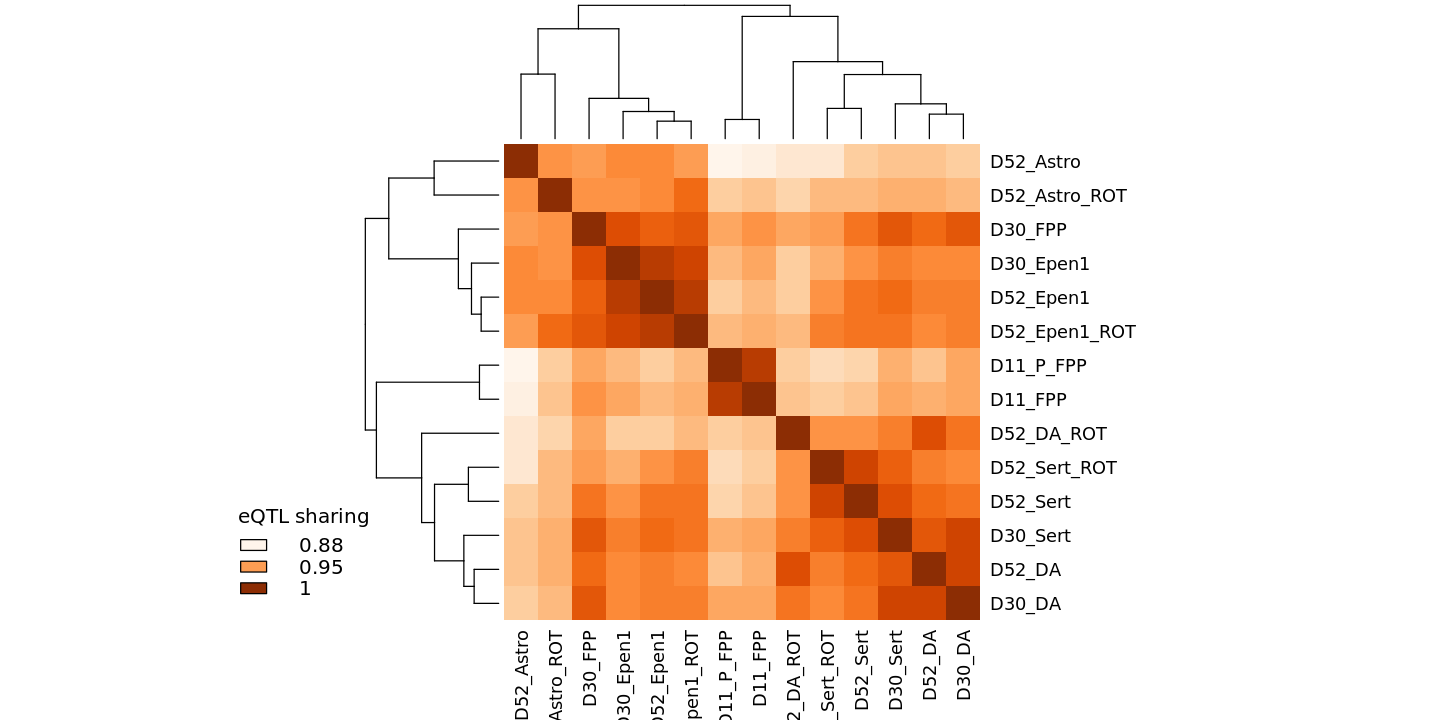

In [40]:
options(repr.plot.width=12, repr.plot.height=6)
heatmap(mat_to_plot, symm = T, col= colorRampPalette(brewer.pal(8, "Oranges"))(25))
legend(x="bottomleft", legend=c(round(min(mat_to_plot),digits = 2), 
                                round(mean(mat_to_plot),digits = 2), max(mat_to_plot)), 
       fill=colorRampPalette(brewer.pal(8, "Oranges"))(3),
      title = "eQTL sharing", bty = "n")

In [45]:
pdf(paste0(fig_dir,"Ext_Fig_7c.pdf"), width=12, height=6)
heatmap(mat_to_plot, symm = T, col= colorRampPalette(brewer.pal(8, "Oranges"))(25))
legend(x="bottomleft", legend=c(round(min(mat_to_plot),digits = 2), 
                                round(mean(mat_to_plot),digits = 2), max(mat_to_plot)), 
       fill=colorRampPalette(brewer.pal(8, "Oranges"))(3),
      title = "eQTL sharing", bty = "n") 
dev.off()

png 
  2

In [41]:
###

In [42]:
df = lfsrMat
df$how_many_maps = 0
for (i in 1:nrow(df)){
    df$how_many_maps[i] = sum(df[i,1:(ncol(df)-1)]<0.05)
}

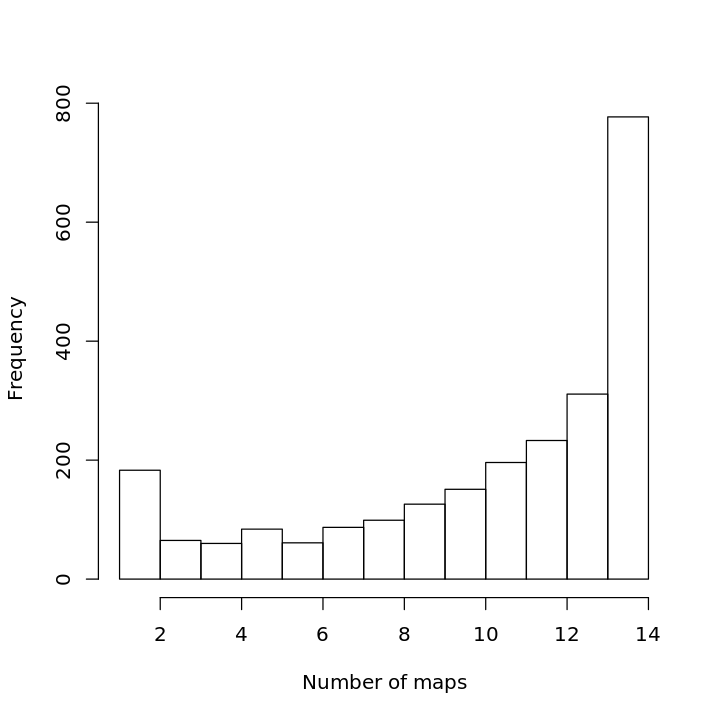

In [48]:
options(repr.plot.width=6, repr.plot.height=6)
hist(df[df$how_many_maps>0,'how_many_maps'], breaks = 14, main = "", xlab = "Number of maps")

In [49]:
pdf(paste0(fig_dir,"Ext_Fig_7d.pdf"), width=6, height=6)
hist(df[df$how_many_maps>0,'how_many_maps'], breaks = 14, main = "", xlab = "Number of maps")
dev.off()

png 
  2